In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
#train = train.drop(['Cabin'],1)
#train = train.drop(['Embarked'],1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape[0])
print(df.isnull().sum())

891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Аналитика**

In [4]:
print('Общая выживаемость: ', round((df['Survived'].value_counts()[1] / df['Survived'].count()) * 100, 2), '%', sep='')

Общая выживаемость: 38.38%


Text(0.5, 0.98, 'Абсолютное количество')

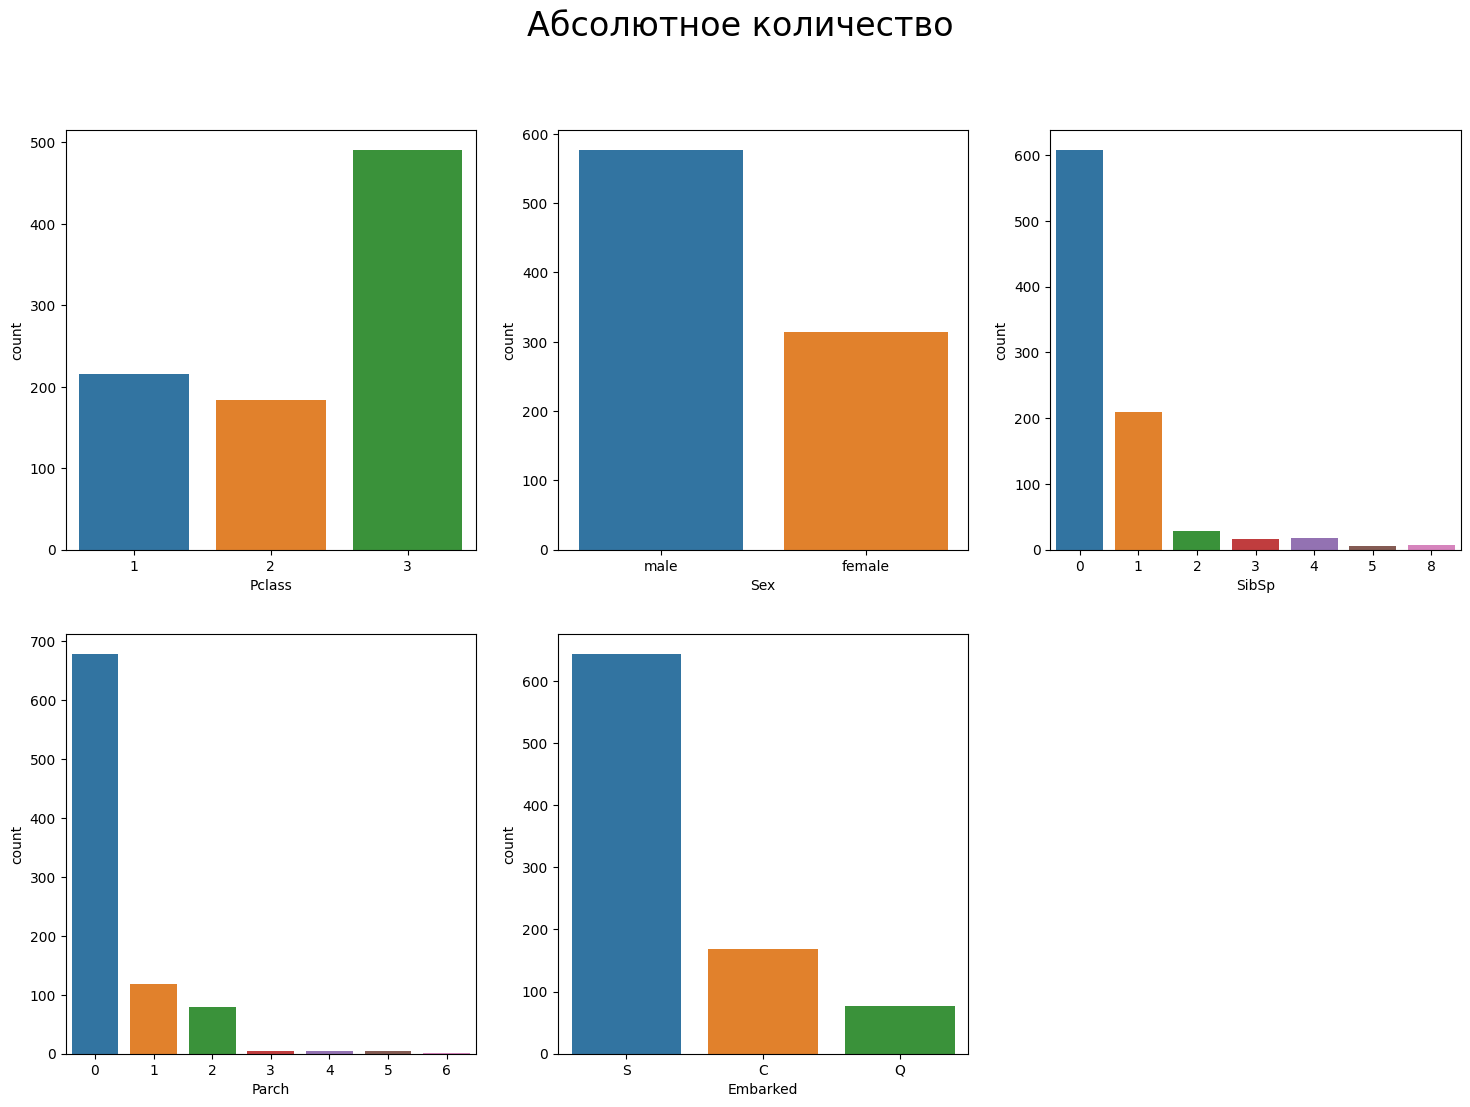

In [5]:
#Categorical
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

class_count = df['Pclass'].value_counts()
sex_count = df['Sex'].value_counts()


sns.countplot(data=df, x='Pclass', ax=ax0)
sns.countplot(data=df, x='Sex', ax=ax1)
sns.countplot(data=df, x='SibSp', ax=ax2)
sns.countplot(data=df, x='Parch', ax=ax3)
sns.countplot(data=df, x='Embarked', ax=ax4)

fig.suptitle('Абсолютное количество', fontsize=24)

Text(0.5, 0.98, 'Выживаемость (%)')

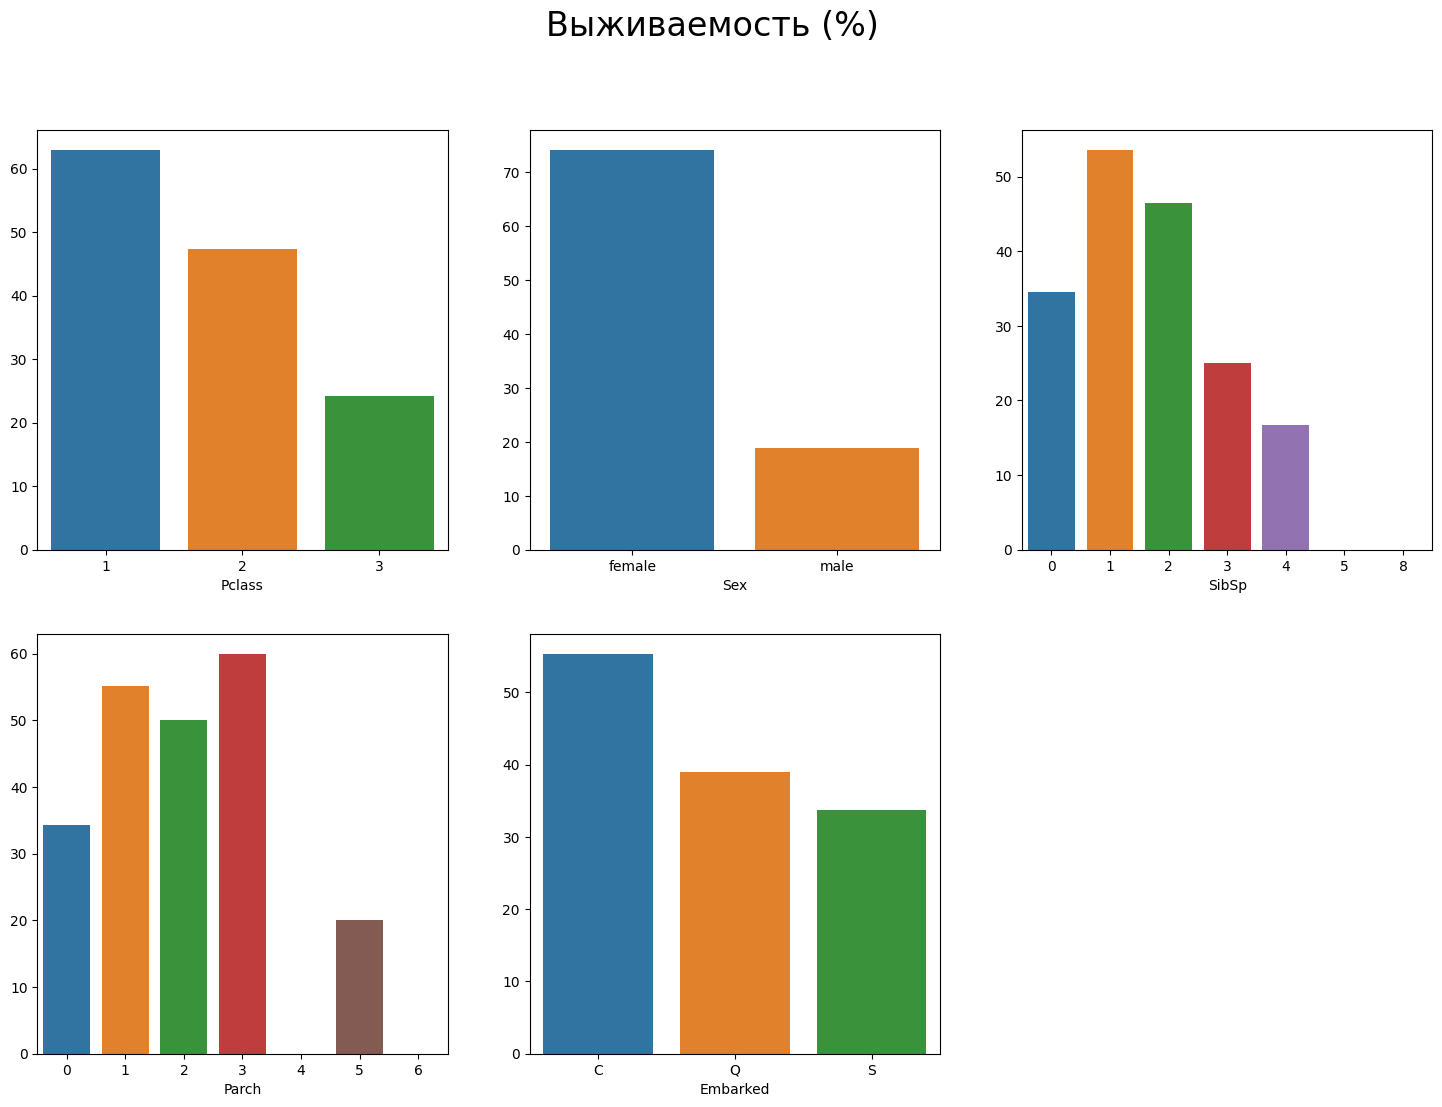

In [6]:
pclass = df[['Pclass','Survived']].groupby(['Pclass'])
pclass = (pclass.sum() / pclass.count() * 100)['Survived']
sex = df[['Sex','Survived']].groupby(['Sex'])
sex = (sex.sum() / sex.count() * 100)['Survived']
sib = df[['SibSp','Survived']].groupby(['SibSp'])
sib = (sib.sum() / sib.count() * 100)['Survived']
parch = df[['Parch','Survived']].groupby(['Parch'])
parch = (parch.sum() / parch.count() * 100)['Survived']
embark = df[['Embarked','Survived']].groupby(['Embarked'])
embark = (embark.sum() / embark.count() * 100)['Survived']

fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

sns.barplot(x=pclass.index,y=pclass.values, ax=ax0)
sns.barplot(x=sex.index,y=sex.values, ax=ax1)
sns.barplot(x=sib.index,y=sib.values, ax=ax2)
sns.barplot(x=parch.index,y=parch.values, ax=ax3)
sns.barplot(x=embark.index,y=embark.values, ax=ax4)


fig.suptitle('Выживаемость (%)', fontsize=24)

Выводы: 
* Чем выше класс билета тем больше шанс на выживание
* Женщины выживают значительно чаще чем мужчины

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Возрастное распределение')

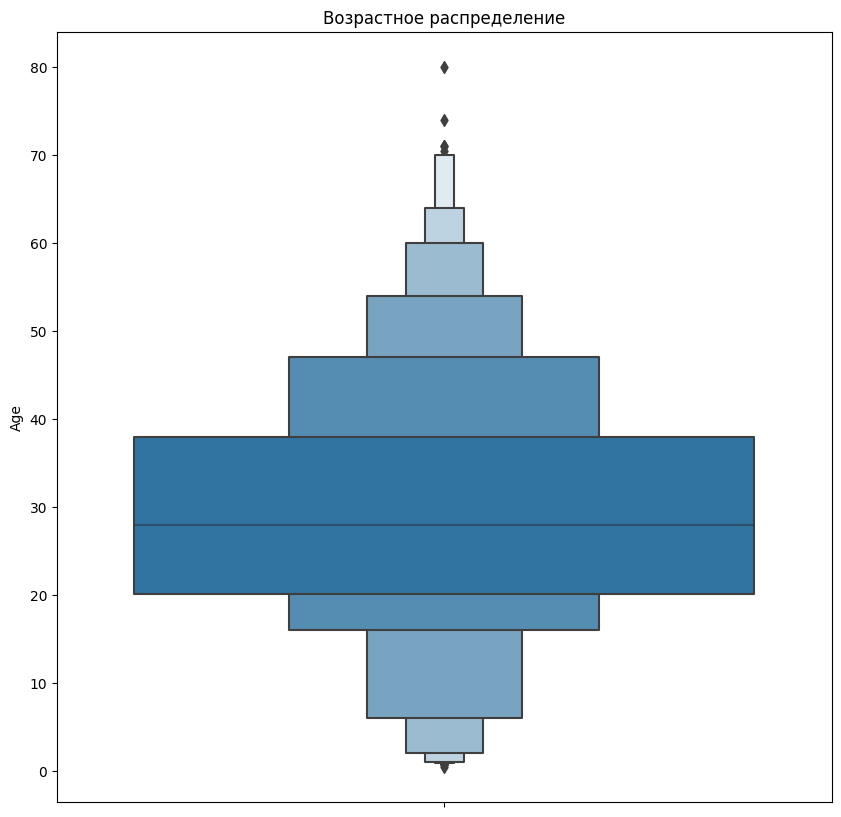

In [7]:
fig = plt.figure(figsize=(10,10))


sns.boxenplot(y=df['Age']).set_title('Возрастное распределение')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


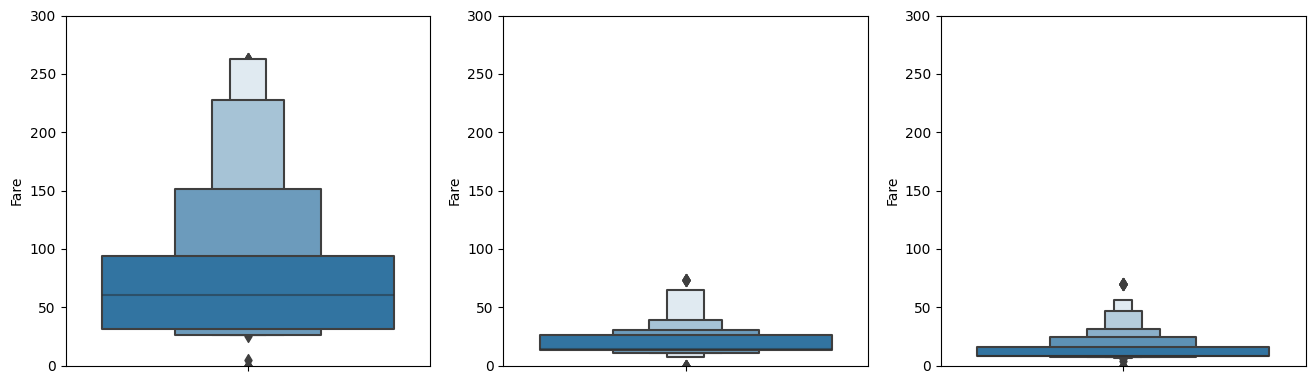

In [8]:
pfare = df[['Pclass', 'Fare']]

fig = plt.figure(figsize=(16,10))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

sns.boxenplot(y=pfare[pfare['Pclass'] == 1]['Fare'],ax = ax0)
sns.boxenplot(y=pfare[pfare['Pclass'] == 2]['Fare'],ax = ax1)
sns.boxenplot(y=pfare[pfare['Pclass'] == 3]['Fare'],ax = ax2)

ax0.set(ylim = (0,300))
ax1.set(ylim = (0,300))
ax2.set(ylim = (0,300))

plt.show()

Цена билета напрямую зависит от класса билета

In [9]:
#Numericals correlations
corrs = df[['Survived','Pclass','Age','SibSp','Parch']].corr()
corrs

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000


<Axes: >

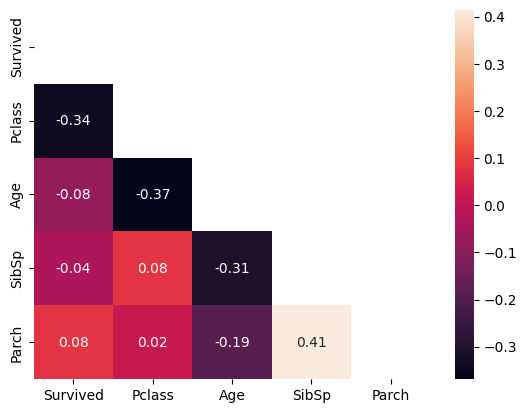

In [10]:
mask = np.triu(np.ones_like(corrs))
sns.heatmap(corrs,annot=True,fmt='.2f',mask=mask)

# **Feature engineering**

Будут отброшены следующие признаки:
* Стоимость билета(Fare) - сама по себе не несет никакой информации кроме как о классе билета который и так указан
* Номер билета(Ticket) - не несет информации
* Номер каюты(Cabin) - большая часть данных потеряна
* Имя (Name) - не несет информации

In [11]:
df = df.drop(['Fare','Ticket','Cabin','Name'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


**Обработка NaN значений**

In [12]:
age_miss = df[df['Age'].isna()]
print(age_miss['Sex'].value_counts())
print(age_miss['Pclass'].value_counts())
print(age_miss['Survived'].value_counts())
print(age_miss['Embarked'].value_counts())

Sex
male      124
female     53
Name: count, dtype: int64
Pclass
3    136
1     30
2     11
Name: count, dtype: int64
Survived
0    125
1     52
Name: count, dtype: int64
Embarked
S    90
Q    49
C    38
Name: count, dtype: int64


В основном возраст не записали у обладателей билета 3 класса

In [13]:
df=df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [14]:
#try impute?
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer()
#imputed_df = imputer.fit_transform(df)

**Обработка категориальных данных**

In [15]:
encoded = pd.get_dummies(df[['Sex','Embarked']],dtype=int)
df = df.join(encoded)
df = df.drop(['Sex','Embarked','Sex_male'], axis=1)

# **Предобработка**

In [16]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [17]:
#train-test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Standratization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Модели**

In [18]:
from sklearn.model_selection import GridSearchCV

**Логистическая регрессия**

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

C_vals = [1,2,3,4,5,6,7,8,9,10,12]
tol = [1e-7,1e-6,1e-5,1e-4,1e-3]
penalties = ['l2']
param = {'penalty': penalties, 'C': C_vals, 'tol':tol,'max_iter': [1000]}

grid = GridSearchCV(estimator=model,
                   param_grid=param,
                    scoring='accuracy',
                    cv=5
                   )

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.7945935483870968
{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'tol': 1e-07}


**KNN**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

n_neighbors = [10,20,40,80,200]
leaf_size= [1,2,5,10,20,30]
param = {'n_neighbors': n_neighbors, 'leaf_size': leaf_size}

grid = GridSearchCV(estimator=model,
                   param_grid=param,
                    scoring='accuracy',
                    cv=5
                   )

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.5922967741935483
{'leaf_size': 1, 'n_neighbors': 200}


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

**SVM**

In [28]:
from sklearn.svm import SVC

model = SVC()

C = [1,2,3,4]
degree=[1,2,3,4]
tol= [0.00001,0.0001,0.001, 0.01]

param = {'C': C, 'tol': tol,'degree':degree}

grid = GridSearchCV(estimator=model,
                   param_grid=param,
                    scoring='accuracy',
                    cv=5
                   )

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.5922967741935483
{'C': 1, 'degree': 1, 'tol': 1e-05}


**NN**

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)

Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6228 - loss: 4.7533 - val_accuracy: 0.5702 - val_loss: 3.2775
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6410 - loss: 2.7047 - val_accuracy: 0.6228 - val_loss: 2.0329
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6348 - loss: 2.3167 - val_accuracy: 0.6316 - val_loss: 1.4686
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6307 - loss: 1.5286 - val_accuracy: 0.6579 - val_loss: 0.9323
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6321 - loss: 0.9897 - val_accuracy: 0.6930 - val_loss: 0.7711
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6588 - loss: 0.7543 - val_accuracy: 0.7105 - val_loss: 0.6411
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6643 - loss: 0.8500 - val_accuracy: 0.7281 - val_loss: 0.6094
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7061 - loss: 0.7105 - val_accuracy: 0.7456 - val_loss: 0.5845
Ep

Лучшая модель - логистическая регрессия

**Crossval**

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2',C=10, tol=1e-07, max_iter=1000)

kf = KFold(n_splits=8)

count = 1
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    print(prediction)

    print('Fold:', count)
    count += 1
    print('Confusion matrix: \n',confusion_matrix(y_test, prediction))
    print('Classification report: \n', classification_report(y_test,prediction))

[0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1]
Fold: 1
Confusion matrix: 
 [[44 14]
 [ 7 24]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        58
           1       0.63      0.77      0.70        31

    accuracy                           0.76        89
   macro avg       0.75      0.77      0.75        89
weighted avg       0.78      0.76      0.77        89

[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0]
Fold: 2
Confusion matrix: 
 [[53  6]
 [10 20]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        59
           1       0.77      0.67      0.71        30

 

Расшифровка confusion matrix Fold 8:
Модель:

* Правильно предсказала выживших - 43
* Предсказала выжившего как погибшего - 12
* Предсказала погибшего как выжившего - 7
* Правильно предсказала погибшего - 27

Вывод:
В работе получилось огромное количество аналитики, на нее ушло больше времени чем на отладку моделей. Но данный подход оправдал себя и может считаться правильным, т.к. правильная аналитика дает глубокое понимание проблемы и данных, и позволяет правильно выполнить предобработку и feature engineering, от которых в первую очередь и зависит продуктивность моделей. Также стоит отметить что сложность и продвинутость решения не означает его оптимальность, простая модель легко может обойти глубокую нейронную сеть.
